In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("HousingData.csv")

# Show first few rows
print(df.head())

# Check info and missing values
print(df.info())
print(df.isnull().sum())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float6

In [3]:
# Fill missing values with column mean
df = df.fillna(df.mean())


In [4]:
X = df.drop("MEDV", axis=1)
y = df["MEDV"]


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

lin_reg = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

lin_reg.fit(X_train, y_train)
ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)


Lasso(alpha=0.1)

In [7]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {"Linear Regression": lin_reg, "Ridge": ridge, "Lasso": lasso}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"{name}: RMSE={rmse:.2f}, R2={r2:.2f}")


Linear Regression: RMSE=5.00, R2=0.66
Ridge: RMSE=5.00, R2=0.66
Lasso: RMSE=5.11, R2=0.64


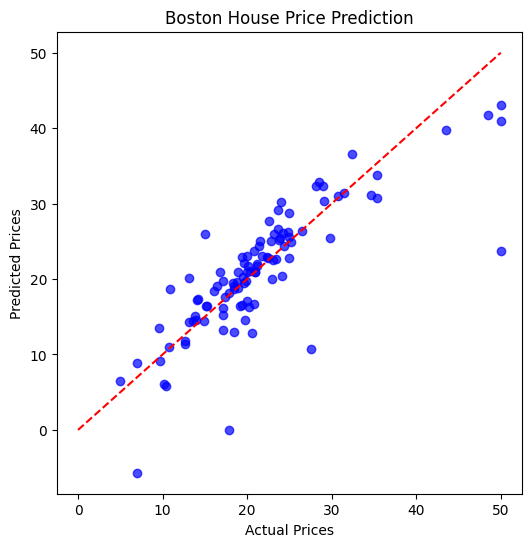

In [8]:
import matplotlib.pyplot as plt

y_pred = lin_reg.predict(X_test)

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.7, color="blue")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Boston House Price Prediction")
plt.plot([0,50],[0,50], 'r--')
plt.show()
